# Clustering


    An intelligent being cannot treat every object it sees as a unique entity unlike anything
    else in the universe. It has to put objects in categories so that it may apply its hard-won
    knowledge about similar objects encountered in the past, to the object at hand.
    Steven Pinker, How the Mind Works, 1997.
    
- Agrupamentos são manifestações naturais da percepção de que objetos (animados ou inanimados) partilham uma mesma característica .
- Cada substantivo em qualquer lingua é simplesmente um rótulo que agrupa elementos. Nomear e agrupar são atividades essencialmente sinônimas.
- A classificação possibilita a redução dos dados e o armazenamento da informação pertinente: $\downarrow$ tempo de busca e armazenamento.

Em geral, o objetivo da análise de clusters é gerar uma partição do espaço na qual há haja uma relação 1-a-1 com os possíveis rótulos,

$$f: \text{observacao} \xrightarrow{} \text{rótulo}.$$

Algumas técnicas atribuem observações a múltiplos clusters ou a nenhum cluster, mas focaremos no caso básico citado acima.

Cormack (1971) e Gordon (1999) expõe que uma possível definição formal de agrupamento pode ser baseada nos conceitos de **homogeneidade e separação**.

- Gostariamos que objetos dentro de um mesmo grupo partilhem características.
- Gostariamos que objetos em grupos diferentes sejam relativamente distantes.


### Def.: Partição

Seja $\Omega$ o espaço amostral, uma partição de $\Omega$ é uma coleção de subconjuntos disjuntos de $\Omega$ que satisfaz $\bigcup_{i\in I}A_i=\Omega$.

- Podemos deduzir do que foi dito até o momento que o primeiro passo na tarefa de agrupar os dados é **gerar visualizações gráficas**.

Sejam $C=\{a_1,\dots,a_c\}$ as classes presentes no problema, os membros da nossa partição serão da forma $A_i=\{x:d(x)=i\}, i\in C$.

## Exemplos

Várias áreas realizavam agrupamentos com base em regras observacionais antes da difusão de técnicas numéricas.

- Biologia: Aristoteles, Teophrastos, Linné, Darwin.
- Química: Mendeleyev.
- Astronomia: Hertzsprung–Russell


In [1]:
# Pacotes
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import random
from random import gauss
import seaborn as sns
from math import sin, cos 
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd

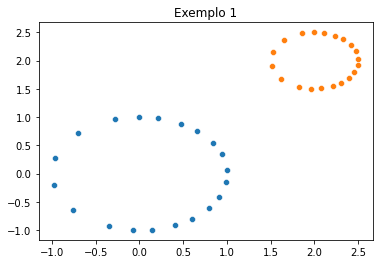

In [3]:
# Gerando um exemplo com alta homogeneidade e separacao
sample_size= 20
x0 = [sin(x/2)   for x in range(0,sample_size)]
y0 = [cos(x/2)   for x in range(0,sample_size)]
x1 = [2+sin(x/2)*0.5 for x in range(0,sample_size)]
y1 = [2+cos(x/2)*0.5 for x in range(0,sample_size)]

g = sns.scatterplot(x=x0,y=y0)
sns.scatterplot(x=x1,y=y1)
g.set_title("Exemplo 1")
plt.show()

## Multimodalidade e agrupamentos

A multimodalidade apesar de não garantir que o processo gerador dos dados detenha $n$ classes distintas é um forte índicio de multiplos rótulos.

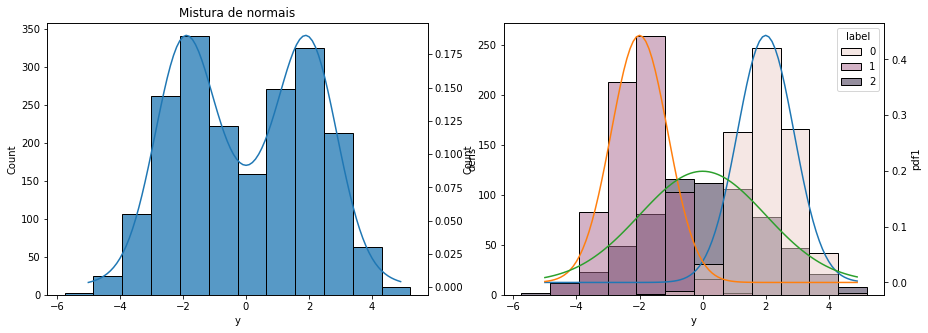

In [4]:
# Exemplo de DGP mistura finita de 2 normais
mu1,mu2,mu3 = 2,-2,0
sd1,sd2,sd3 = 0.9,0.9,2 
seq     = range(2000)
df = pd.DataFrame(
    columns=['label', 'y'],
    index=seq)
for x in seq:
    df.iloc[x,0] = random.sample([0,1,2],1)[0]
    if df.iloc[x,0]==0:
        df.iloc[x,1]=gauss(mu=mu1,sigma=sd1)
    elif df.iloc[x,0]==1: 
        df.iloc[x,1]=gauss(mu=mu2,sigma=sd2)
    else:
        df.iloc[x,1]=gauss(mu=mu3,sigma=sd3)
        
# Criando uma data frame a partir de um dict de listas
lower_bound = -5
upper_bound = 5
pdf1 = pd.DataFrame({
    'x':[x for x in np.arange(lower_bound,upper_bound,0.1)],
    'pdf1':[stats.norm.pdf(x,mu1,sd1) for x in np.arange(lower_bound,upper_bound,0.1)]})
pdf2 = pd.DataFrame({
    'x':[x for x in np.arange(lower_bound,upper_bound,0.1)],
    'pdf2':[stats.norm.pdf(x,mu2,sd2) for x in np.arange(lower_bound,upper_bound,0.1)]})
pdf3 = pd.DataFrame({
    'x':[x for x in np.arange(lower_bound,upper_bound,0.1)],
    'pdf3':[stats.norm.pdf(x,mu3,sd3) for x in np.arange(lower_bound,upper_bound,0.1)]})

def three_comp_gaussian_mix(x):
    dens=(stats.norm.pdf(x,mu1,sd1)+stats.norm.pdf(x,mu2,sd2)+stats.norm.pdf(x,mu3,sd3))/3
    return dens

mix3 = pd.DataFrame({
    'x':[x for x in np.arange(lower_bound,upper_bound,0.1)],
    'dens':[three_comp_gaussian_mix(x) for x in np.arange(lower_bound,upper_bound,0.1)]})

# Plotando as pdfs
plt.rcParams['figure.figsize'] = (15,5)
fig,ax= plt.subplots(nrows=1,ncols=2)
g0=sns.histplot(data=df, x='y', bins='sturges',ax=ax[0])
ax0=ax[0].twinx()
sns.lineplot(data=mix3,x='x',y='dens',ax=ax0)

# Plotando cada componente separamente
g1=sns.histplot(data=df, x='y',hue='label', bins='sturges',ax=ax[1])
ax1=ax[1].twinx()
sns.lineplot(data=pdf1,x='x',y='pdf1',ax=ax1)
sns.lineplot(data=pdf2,x='x',y='pdf2',ax=ax1)
sns.lineplot(data=pdf3,x='x',y='pdf3',ax=ax1)
g0.set_title('Mistura de normais')
plt.show()

**Warning**: Multimodality may be hard to be visually detected at high dimensions. Pairwise scatterplots plots may no exhbit multimodality.

## Matriz de scatterplots

A matriz de gráficos de dispersão apresenta gráficos de dispersão das variáveis $i$ contra $j$ em cada elemento $a_{ij}$ e histogramas na diagonal $a_{ii}$.

- Argumento para manter o espelhamento apesar da redundância: Possibilita a análise dos gráficos na com base no eixo de cada variável.

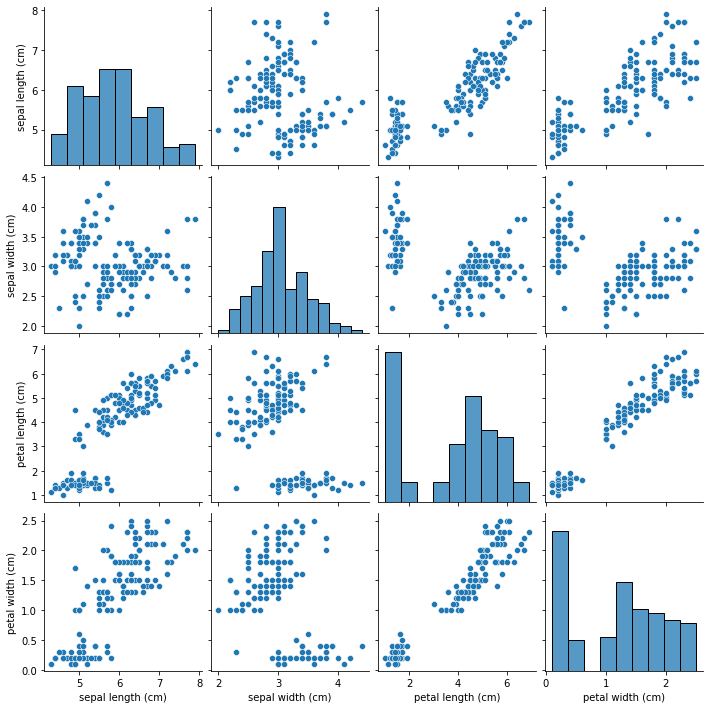

In [2]:
data=load_iris(as_frame=True)
X = data['data']
y = data['target']
sns.pairplot(X)

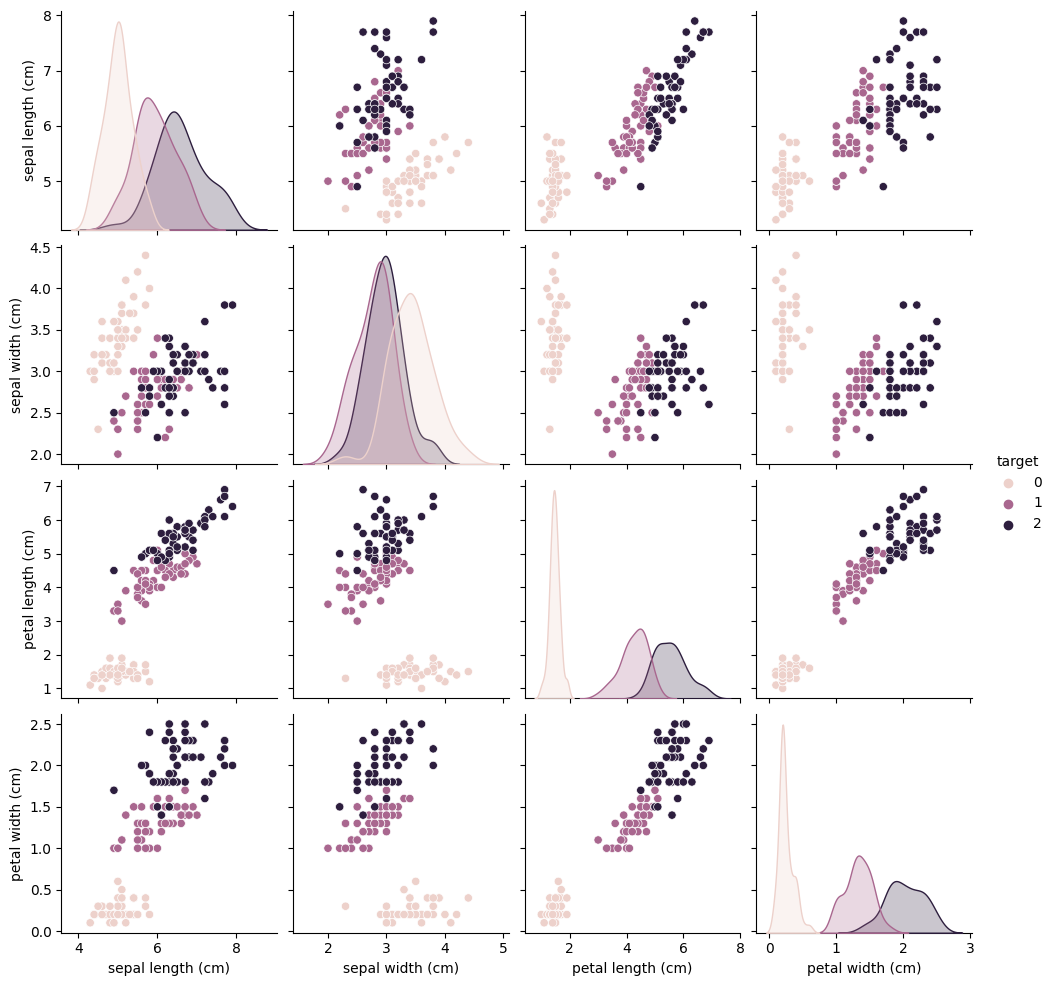

In [3]:
X['target'] = y
sns.pairplot(X,hue='target')

## Noções de proximidade

Note que durante o processo de agrupar objetos, estabelecer algum critério para comparar os diferentes objetos é essencial para que nossas conclusões sejam lógicas e replicáveis dado que somos viesados cognitivamente e portanto nossas conclusões a partir da análise exploratória também.

    Humans are good at discerning subtle patterns that are really there, but equally so at
    imagining them when they are altogether absent. Carl Sagan.

### Def.: Métrica

Uma métrica sobre um conjunto $A$ é uma função $d:A\times A \to \mathbb{R}_+$ que detém as seguintes características
1. Positiva-definida: $\forall x,y\in A, \quad d(x,y) \geq 0$ tal que a igualdade ocorre se e somente se $x=y$.
2. Simetrica: $\forall x,y\in A, \quad d(x,y)=d(y,x)$
3. Desigualdade triangular: $\forall x,y,z \in A, \; d(x,y)\leq d(x,z)+d(z,y)$

### Def.: Similaridade


### Exemplos
#### Categorial similarities
1. Matching similarity (Mutual absence + presence):  $$M =\frac{s_{11} + s_{00}}{s_{11}+s_{00}+s_{01}+s_{10}}$$
2. Jaccard similarity (Mutual presence only): $$J=\frac{s_{11}}{s_{11}+s_{01}+s_{10}}$$

#### Continuous similarities
1. Minkowski distances ($\ell_p$), $p\geq 1$: $$d(\mathbf{x}_i,\mathbf{x}_j) = \left(\sum_{k=1}^p|\mathbf{x}_{jk}-\mathbf{x}_{ik}|^p\right)^{1/p}$$
2. Pearson correlation: The pearson correlation is given by the ratio of the sample covariance and the product of the sample standard deviations
$$\frac{\sum_{k=1}^p (x_{ik}-\bar{x}_i)(x_{jk}-\bar{x}_j)}{\left(\sum_{k=1}^p (x_{ik}-\bar{x}_i)^2 \sum_{k=1}^p (x_{jk}-\bar{x}_j)^2\right)^{1/2}}$$

Euclidean and manhattan distances are particular cases of $\ell_p$ distances corresponding to $p=2$ and $p=1$.


## Pre-processing data: Weighting, transformations, scaling and standardization

Its feasible to presume that variables in our dataset have different importance levels, thus weighting we may want to weight them accordingly. Weighting comprises many procedures such as variable selection and standardization.

- Variable selection: Sets the weight to 1 or 0 acording to a given criterion.
- Standardization: Weights variables according to the inverse of their variability.
- Uniform weights
- Data-based weights

## Metric-based models

### Hierarchical clustering

Hierarchical clustering groups observations according to a similarit/distance criteriong joining or dividing taking optimal steps and moving observations at each iteration.

#### Agglomerative clustering

Agglomerative clustering starts with each observation in a cluster and progressively groups observations with respect to a distance/similarity condition.

1. **Single linkage**: Minimizes the distance between the closest observations of pairs of clusters. Leads to uneven cluster sizes and chaining. Can detect non-ellipsoidal clusters but may perfomy poorly over datasets with low separation between clusters. Changing the distance only affects the clusters when the relative ordering is disturbed.


2. **Complete linkage**: Minimizes the maximum distance between observations of pairs of clusters. Compact clusters with similar diameters.


3. **Average linkage**: Minimizes the average of the distances between all observations of pairs of clusters. Regular sizes. Similar to Ward but allows a flexible metric choice. Merges clusters with low variances. Relatively Robust. Changes in the distance/similarity directly affect the cluster assignments.

4. **Ward**: Minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach. Assumes variables are in an Euclidean space. Same-size spherical clusters. Sensitive to outliers. Precursor of the optimization-based models.

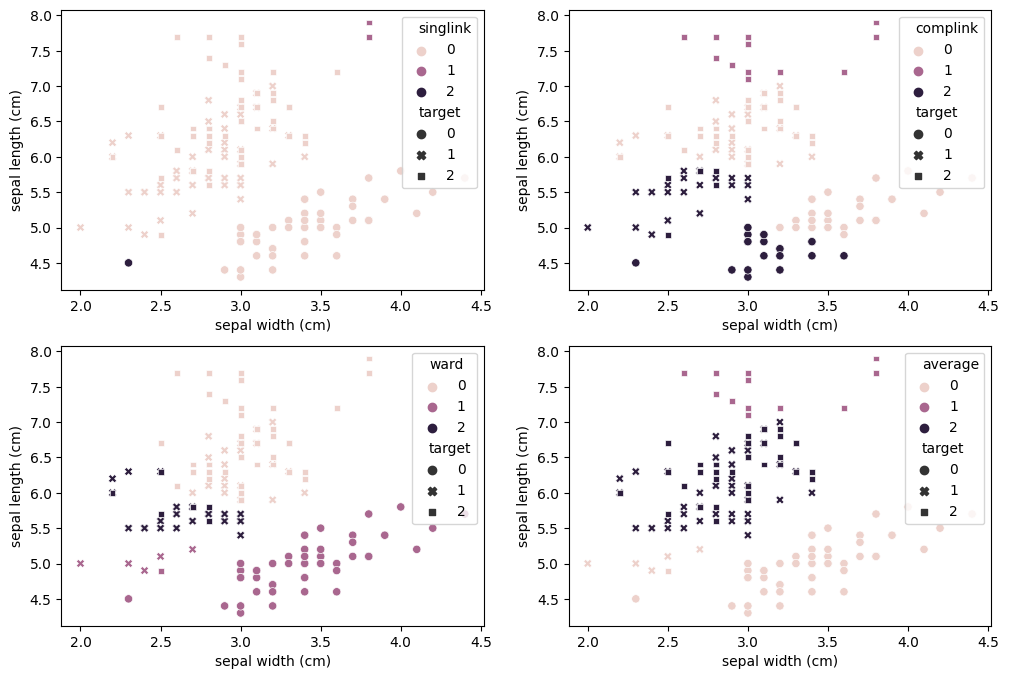

In [4]:
from sklearn import cluster
import numpy as np

def cluster_labels(model):
    model_obj = sklearn.cluster.AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage=model)
    model_obj.fit(X.loc[:,['sepal length (cm)','sepal width (cm)']])
    return model_obj.labels_
    
X['singlink']=cluster_labels('single')
X['complink']=cluster_labels('complete')
X['ward']    =cluster_labels('ward')
X['average'] =cluster_labels('average')

plt.rcParams['figure.figsize'] = (12,8)
fig,ax=plt.subplots(nrows=2,ncols=2)
sns.scatterplot(data=X,y='sepal length (cm)',x='sepal width (cm)',hue='singlink',style='target',ax=ax[0,0])
sns.scatterplot(data=X,y='sepal length (cm)',x='sepal width (cm)',hue='complink',style='target',ax=ax[0,1])
sns.scatterplot(data=X,y='sepal length (cm)',x='sepal width (cm)',hue='ward',style='target',ax=ax[1,0])
sns.scatterplot(data=X,y='sepal length (cm)',x='sepal width (cm)',hue='average',style='target',ax=ax[1,1])
plt.show()

## Dendogram

The dendogram is a useful graphical tool to check the behaviour of the agglomerative clustering techniques.

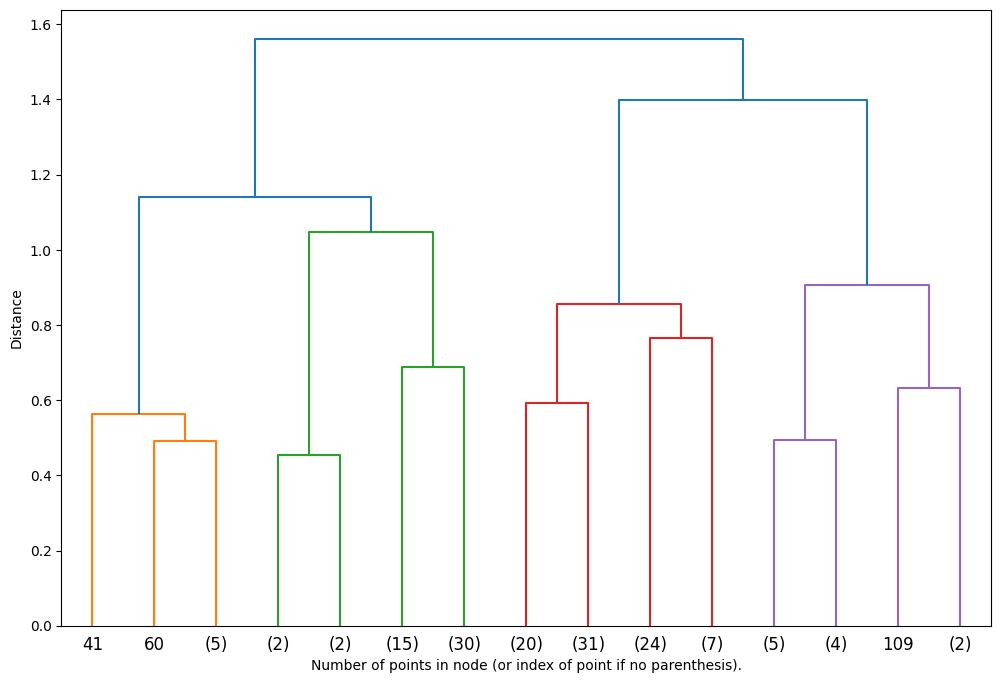

In [5]:
from scipy.cluster.hierarchy import dendrogram
average_link = sklearn.cluster.AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average', compute_distances=True)
average_link.fit(X.loc[:,['sepal length (cm)','sepal width (cm)']])
    
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    average_link = sklearn.cluster.AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
    average_link.fit(X.loc[:,['sepal length (cm)','sepal width (cm)']])
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    

# plot the top three levels of the dendrogram
plot_dendrogram(average_link, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance")
plt.show()

## Silhouette plot

O silhouette plot exibe um coeficiente que indica se uma observação está mais próxima dos outros membros de seu cluster ou dos membros do outro cluster mais próximo.

Para a i-esima observação:
- Calcula-se a distancia média da observação a cada outro cluster.
- Selecione $a_i$ a distancia ao proprio cluster e $b_i$ a distancia ao outro cluster mais proximo.
- $s_i = (a_i-b_i)/\max{a_i,b_i}$

In [26]:
from sklearn.metrics import silhouette_samples, silhouette_score

average_link = sklearn.cluster.AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
average_link.fit(X.loc[:,['sepal length (cm)','sepal width (cm)']])

cluster_labels = average_link.labels_
silhouette_avg = silhouette_score(X.loc[:,['sepal length (cm)','sepal width (cm)']], cluster_labels)
sample_silhouette_values = silhouette_samples(X.loc[:,['sepal length (cm)','sepal width (cm)']], cluster_labels)

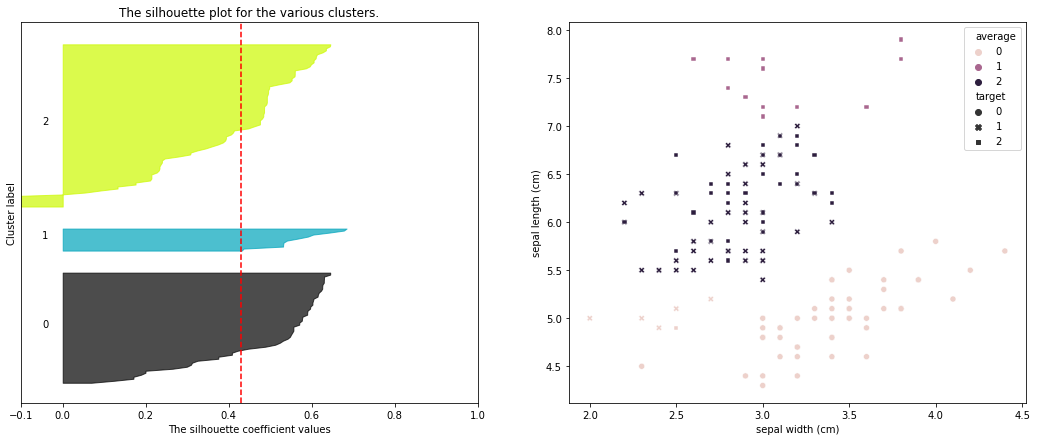

In [39]:
y_lower = 10
n_clusters=3
# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

sns.scatterplot(data=X,y='sepal length (cm)',x='sepal width (cm)',hue='average',style='target',ax=ax[1,1])

# 2nd Plot showing the actual clusters formed
sns.scatterplot(data=X,y='sepal length (cm)',x='sepal width (cm)',hue='average',style='target',ax=ax2)
plt.show()

## Optimization-based models

K-means

## Gaussian Mixture Models

Falar sobre a estrutura de covariancia, etc.
Escolha de numero de clusters atraves de criterios de informacao.

Let $f_{g}, \; g\in\{1,\dots,G\}$ be probability density functions, a finite mixture distribution is a convex combination of densities such as
$$f(y_i)=\sum_{g=1}^G p_g f_g(y_i|\theta_g)$$
such that $p_g \in [0,1]$ and $\sum_g p_g=1$. Each $p_g$ determines the probability of an observation beloging to the $g$-th mixture component $f_g$.

### Example: Univariate gaussian mixture with 2 components
Let $X$ be a random variable with a two-component gaussian mixture distribution, its probability density function is given by
$$f(x;\theta)=\frac{p_1}{\sqrt{2\pi}\sigma_1}\exp\left\{-\frac{(x-\mu_1)^2}{2\sigma_1^2}\right\} +
\frac{p_2}{\sqrt{2\pi}\sigma_2}\exp\left\{-\frac{(x-\mu_2)^2}{2\sigma_2^2}\right\}$$
such that $\mu_1,\mu_2 \in \mathbb{R}$ and $\sigma_1,\sigma_2,\in \mathbb{R}_+$.

We already saw a 3 component gaussian mixture when talking about multimodality.

### Multivariate gaussian distribution
The above mixture is univariate, however almost always we need to deal with higher dimensional data. Thus, we need to introduce the multivariate gaussian distribution. Let $X$ be a multivariate gaussian random variable indexed by $\mu$ and $\Sigma$, $X$ has the following probality density function as long as $\Sigma$ is inversible,
$$f(\mathbf{x}) = (2\pi)^{-p/2}\operatorname{det}(\Sigma)^{-1/2}\exp\left\{-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^\top \Sigma^{-1}(\mathbf{x}-\mathbf{\mu})\right\}.$$
Geometrically, the level curves of $f$ define elipses over $\mathbb{R}^p$ that are shifted around by $\mu$ and rotated/stretched by $\Sigma$.

### Curse of dimensionality

If $X$ is a mixture of p-variate gaussian distributions with $G$ components, then we have to estimate $G-1$ probabilities, $pG$ means and $G p(p-1)/2$ covariance parameters, totalizing 
$$
G-1 + pG + \frac{1}{2}p(p-1)
$$
that has $\mathcal{O}(p^2)$ growth rate (Bachmann-Laundau notation). 

In [51]:
# Suppose we have two classes and 200 covariates
def dim_mix(g,p):
    pars= g-1+p*g+(p*(p+1))/2
    return pars

dim_mix(2,200)

20501.0

###  Defense against the dark arts (e.g. curses)

Linear algebra allows us to represent covariance matrices in an useful way. Taking the eigenvalue decomposition of the $g$-th class covariance matrix, we obtain the following representation called the VSO decomposition of $\Sigma$,

$$
\Sigma_g = a_g D_g \Lambda_g D_g
$$

such that $a_g$ is a proportionality constant, $D_g$ stores the eigenvectors and $\Lambda_g = \text{diag}(\lambda_1,\dots,\lambda_g)$.

Each component controls a property of the class:
1. $a_g$: Scale (Volume occupied by the ellipsoid) 
2. $D_g$: Orientation (Rotates the ellipsoid)
3. $\Lambda_g$: Shape (Stretches its axes)

In order to reduce the number of parameters to be estimated, we may impose restrictions over each one of the components.

This decomposition is fully available at the R package mclust.

### scikit-learn
sklearn.mixture.GaussianMixture(n_components=1, *, covariance_type='full')

String describing the type of covariance parameters to use. Must be one of:

‘full’: each component has its own general covariance matrix, $\Sigma_g$.

‘tied’: all components share the same general covariance , $diag(\sigma^2_{1},\dots,\sigma^2_{p})$.

‘diag’: each component has its own diagonal covariance matrix, $diag(\sigma^2_{g,1},\dots,\sigma^2_{g,p})$.

‘spherical’: each component has its own single variance, $\sigma^2_g I$.

In [189]:
from sklearn import mixture
import numpy as np

# Contaminating the first observation
gm = mixture.GaussianMixture(n_components=3, random_state=0, covariance_type='full').fit(X.loc[:,['sepal length (cm)','sepal width (cm)']])
X['gmm'] = gm.predict(X.loc[:,['sepal length (cm)','sepal width (cm)']])
gm.means_

array([[5.01507898, 3.4514463 ],
       [6.68055626, 3.02849627],
       [5.9009976 , 2.74387546]])

In [188]:
gm.covariances_

array([[[0.11944714, 0.08835648],
        [0.08835648, 0.11893388]],

       [[0.36153508, 0.05159664],
        [0.05159664, 0.08927917]],

       [[0.27671149, 0.08897036],
        [0.08897036, 0.09389206]]])

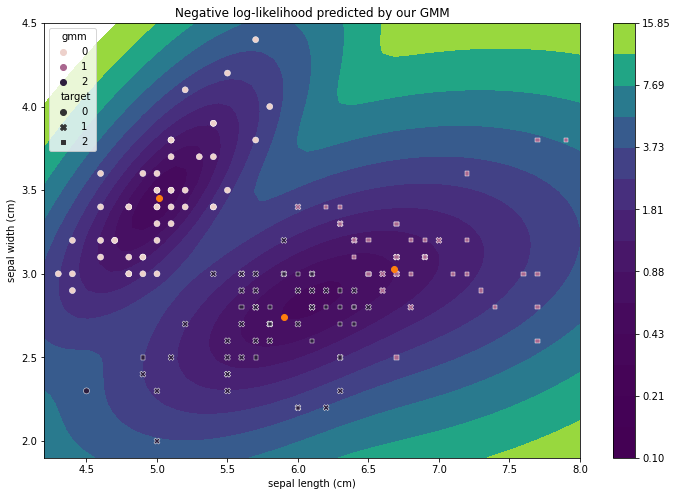

In [266]:
# Display predicted scores by the model as a contour plot
x = np.linspace(min(X.iloc[:,0])-.1, max(X.iloc[:,0])+.1)
y = np.linspace(min(X.iloc[:,1])-.1, max(X.iloc[:,1])+.1)
Xmesh, Ymesh = np.meshgrid(x, y)
XX = np.array([Xmesh.ravel(), Ymesh.ravel()]).T
Z = -gm.score_samples(XX)
Z = Z.reshape(Xmesh.shape)

plt.title("Negative log-likelihood predicted by our GMM")
CS = plt.contourf(
    Xmesh, Ymesh, Z, levels=np.logspace(-1, 1.2, 15), cmap='viridis'
)
plt.colorbar(CS)

# Scatter plot of the observations and the mean
sns.scatterplot(data=X.iloc[:,[0,1,4,9]],x='sepal length (cm)',y='sepal width (cm)',hue='gmm', style='target')
plt.scatter(x=gm.means_[:,0],y=gm.means_[:,1])


## Confusion matrix

The confusion matrix allows us to visualize the true classe versus the predicted classes in a aggregated manner.

Below we can see that class 1 is perfectly predicted, however we missclassify 5 elements of class 3 as members of class 2.

In [14]:
metrics.confusion_matrix(datawithtarget['prediction'],datawithtarget['target'])

array([[50,  0,  0],
       [ 0, 45,  0],
       [ 0,  5, 50]], dtype=int64)

## Bayesian information criterion
Let $k$ be the number of parameters in the model, $n$ the number of observations and $\mathcal{L}$ the likelihood function evaluated at the estimated $\hat{\theta}$,
$$
BIC = k\ln(n)-2\ln(\mathcal{L}(\hat{\theta}))
$$

# Extensions

1. Functional data: Observations are functions (e.q. growth curves).
2. Network data: Stochastic block models.